In [1]:
#API Calls - Los Angeles

import requests
import pandas as pd

# %pip install openpyxl

# Load the FIPS codes into a set for efficiency
fips_codes_df = pd.read_excel('./data_files/Los_Angeles_Tract_ID.xlsx', header=None, engine='openpyxl')
fips_codes = set(fips_codes_df[0].astype(str).str.pad(width=11, side='left', fillchar='0'))

# DataFrame to store all results
los_angeles_data = pd.DataFrame()
print(fips_codes)
# Initialize counters for tracking API calls
success_count = 0
fail_count = 0


# Loop through the FIPS codes, limited by 100 rows. max 178
for i, fips_code in enumerate(fips_codes):
    if i >= 400:
        break  # Exit the loop after reaching max_calls

    # Construct the API URL for Houston data
    url = f"https://ejscreen.epa.gov/mapper/ejscreenRESTbroker1.aspx?namestr={fips_code}&geometry=&distance=&unit=9035&areatype=tract&areaid={fips_code}&f=json"
    response = requests.get(url)
    
    data = response.json()
    if 'data' in data:
        df = pd.json_normalize(data['data'])
        los_angeles_data = pd.concat([los_angeles_data, df], ignore_index=True)
        success_count += 1
    else:
        fail_count += 1

# Display the counts and the first few rows of the combined data
print(f"Success: {success_count}, Failures: {fail_count}")

{'06037181000', '06037571502', '06037501802', '06037231720', '06037404802', '06037183222', '06037573004', '06037901010', '06037117102', '06037128101', '06037461700', '06037574100', '06037120104', '06037125320', '06037123601', '06037125401', '06037311500', '06037262601', '06037265301', '06037301502', '06037209820', '06037187300', '06037239330', '06037197200', '06037911001', '06037293302', '06037189102', '06037301400', '06037311100', '06037224200', '06037186404', '06037480202', '06037480600', '06037242700', '06037237401', '06037575202', '06037570304', '06037500700', '06037197700', '06037572900', '06037226420', '06037536103', '06037406500', '06037407302', '06037402801', '06037216300', '06037403304', '06037575102', '06037602004', '06037192002', '06037544002', '06037296902', '06037276100', '06037190902', '06037239501', '06037621204', '06037800324', '06037123304', '06037272100', '06037203710', '06037431400', '06037189202', '06037542105', '06037402200', '06037183702', '06037604002', '06037462

In [2]:
#Exploring Data

los_angeles_data.describe()
los_angeles_data.shape


(343, 317)

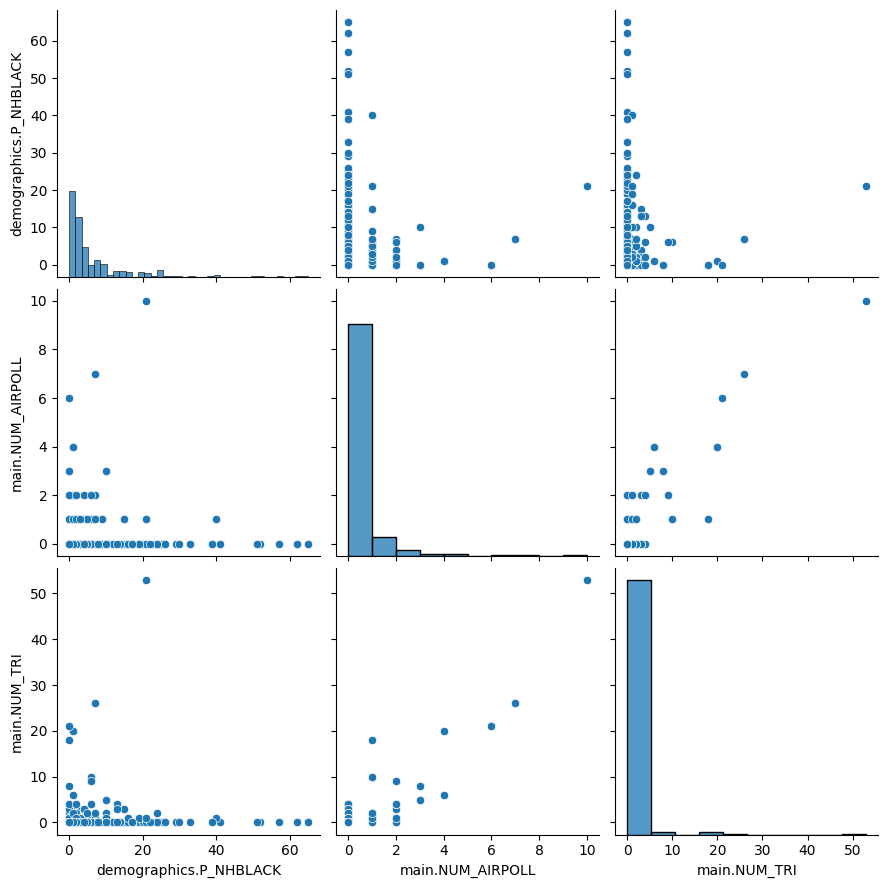

In [3]:
#Visualizing Data

#If you don't already have seaborn
# %pip install --upgrade seaborn
# %pip install --upgrade numpy

import seaborn as sns 
import pandas as pd

#Setting the theme
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#Convert to numeric
los_angeles_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]] = los_angeles_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]].apply(pd.to_numeric)


sns.pairplot(los_angeles_data, vars =["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"],height=3)
# sns.scatterplot(x="demographics.P_NHBLACK", y="extras.RAW_CI_FLOOD", data= los_angeles_data)


#Outliers problematic

In [4]:
#Pandas DF to SQL DB

#inspired by https://stackoverflow.com/questions/30631325/writing-to-mysql-database-with-pandas-using-sqlalchemy-to-sql
# %pip install sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data_files/los_angeles_epa.db')

los_angeles_data.to_sql('los_angeles_epa', engine, index=False, if_exists='replace')

343

In [5]:
#Check SQL Database

from sqlalchemy import create_engine, text

# Create an engine that connects to the SQLite database file in your data_files directory
engine = create_engine('sqlite:///data_files/los_angeles_epa.db')

# Connect to the database
with engine.connect() as connection:
    # Execute a simple SQL query to count the rows in the los_angeles_epa table
    row_count = connection.execute(text("SELECT COUNT(*) FROM los_angeles_epa")).fetchone()[0]

print(f"The number of rows in the 'los_angeles_epa' table is: {row_count}")

The number of rows in the 'los_angeles_epa' table is: 343
